In [1]:
from tensorflow.keras import models
from keras.preprocessing.image import img_to_array  , load_img , ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = models.load_model('wound_aug.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
ls

 cut.jpg                                          non-severe/
 data/                                            Prediction.ipynb
'Deep Learning with tensorflow and keras.ipynb'   severe/
 Image_aug.ipynb                                  Wound_agumented_model.ipynb
 max_cut.jpg                                      wound_aug.h5
 Model_Script/


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 74, 74, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

(1, 150, 150, 3)

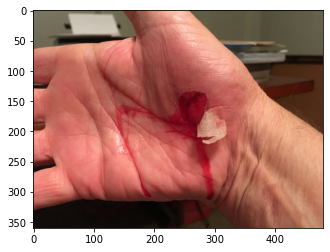

In [5]:
from PIL import Image
import numpy as np
from skimage import transform
np_image = Image.open('cut.jpg')
plt.imshow(np_image)
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (150, 150, 3))
np_image = np.expand_dims(np_image, axis=0)
np_image.shape


In [8]:
p = model.predict(np_image)  #less than 0.5 so Non-Severe
p

array([[0.00104442]], dtype=float32)

(1, 150, 150, 3)

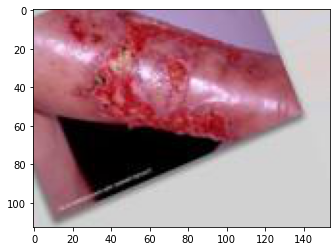

In [14]:
np_image = Image.open('max_cut.jpg')
plt.imshow(np_image)
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (150, 150, 3))
np_image = np.expand_dims(np_image, axis=0)
np_image.shape

In [12]:
p = model.predict(np_image) #More than 0.5 Severe
p

array([[0.9999554]], dtype=float32)